#**CLASIFICADOR CONVOLUCIONAL**


Redes neuronales convolucionales <p>
*Convolutional Neural Networks* <p>
(ConvNet/CNN)

Se usan en visión computacional, donde se entrena a una computadora para qué diga qué es.

Ejemplos: 
* Apps que identifican especies de plantas
* Detección facial, primeras capas líneas horizontales y verticales y las últimas encuentras narices y bocas

<img src = "https://miro.medium.com/max/1400/1*AybnlWB8NElcM2-cFR2eXA.jpeg" />




Inspirado en el Cortex Visual.

La corteza visual es la zona cerebral encargada de decodifiar la percepción y convertirla en visión. La imagen que se capta por la retina se divide en fragmentos que siguen diferents caminos hacia la corteza visual. Una vez dividida, la información se traslad simultáneamente a varios sistems que reparten el tratamiento de las distintas partes en que se desompone la imagen.

<img src = "https://upload.wikimedia.org/wikipedia/commons/1/1e/BA17_Primary_visual_cortex_-_animation.gif" />

La visión, como la mayoría de las funciones cerebrales, está repartida, es decir, para procesarla la envía a varias regiones cerebrales, que luego agrupa de nuevo de alguna forma y VEMOS.


LAs ANN son capaces de construir funciones a partir de otras menos complejas

\\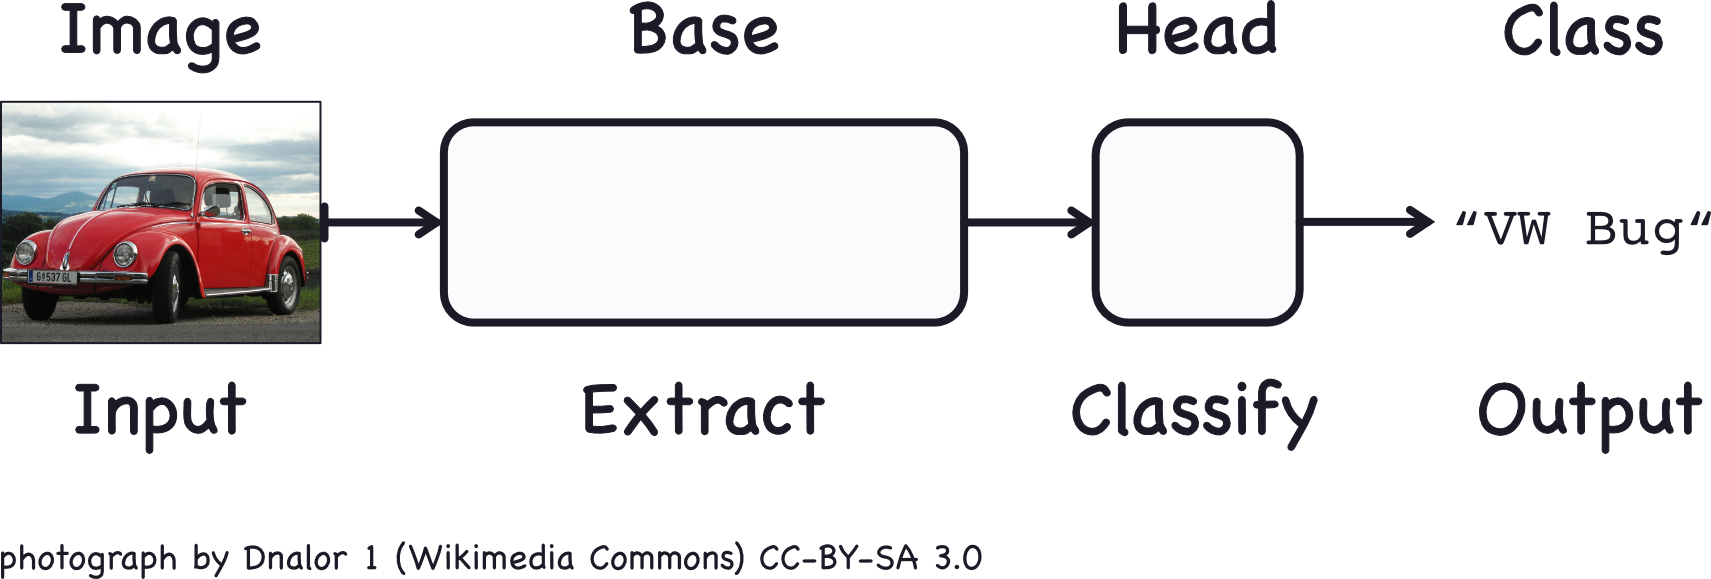

Una convnet para clasificación de imágenes consiste de dos partes:

*   convolutional base
*   dense head

La convolutional base se usa para **extraer las características visuales** de una imagen. Está formada por capas que realizan la operación de convolución, aunque también a veces incluyen otro tipo de capas.

La dense head es usada para **determinar la clase** a la que pertenece la imagen, formada principalmente por capas dense, y a veces otras capas como la dropout.

Una característica visual puede ser una línea, color, textura, forma, patrón ... o alguna combinación.

Nota: aunque las características son más elementales.

El proceso completo podría representarse como:

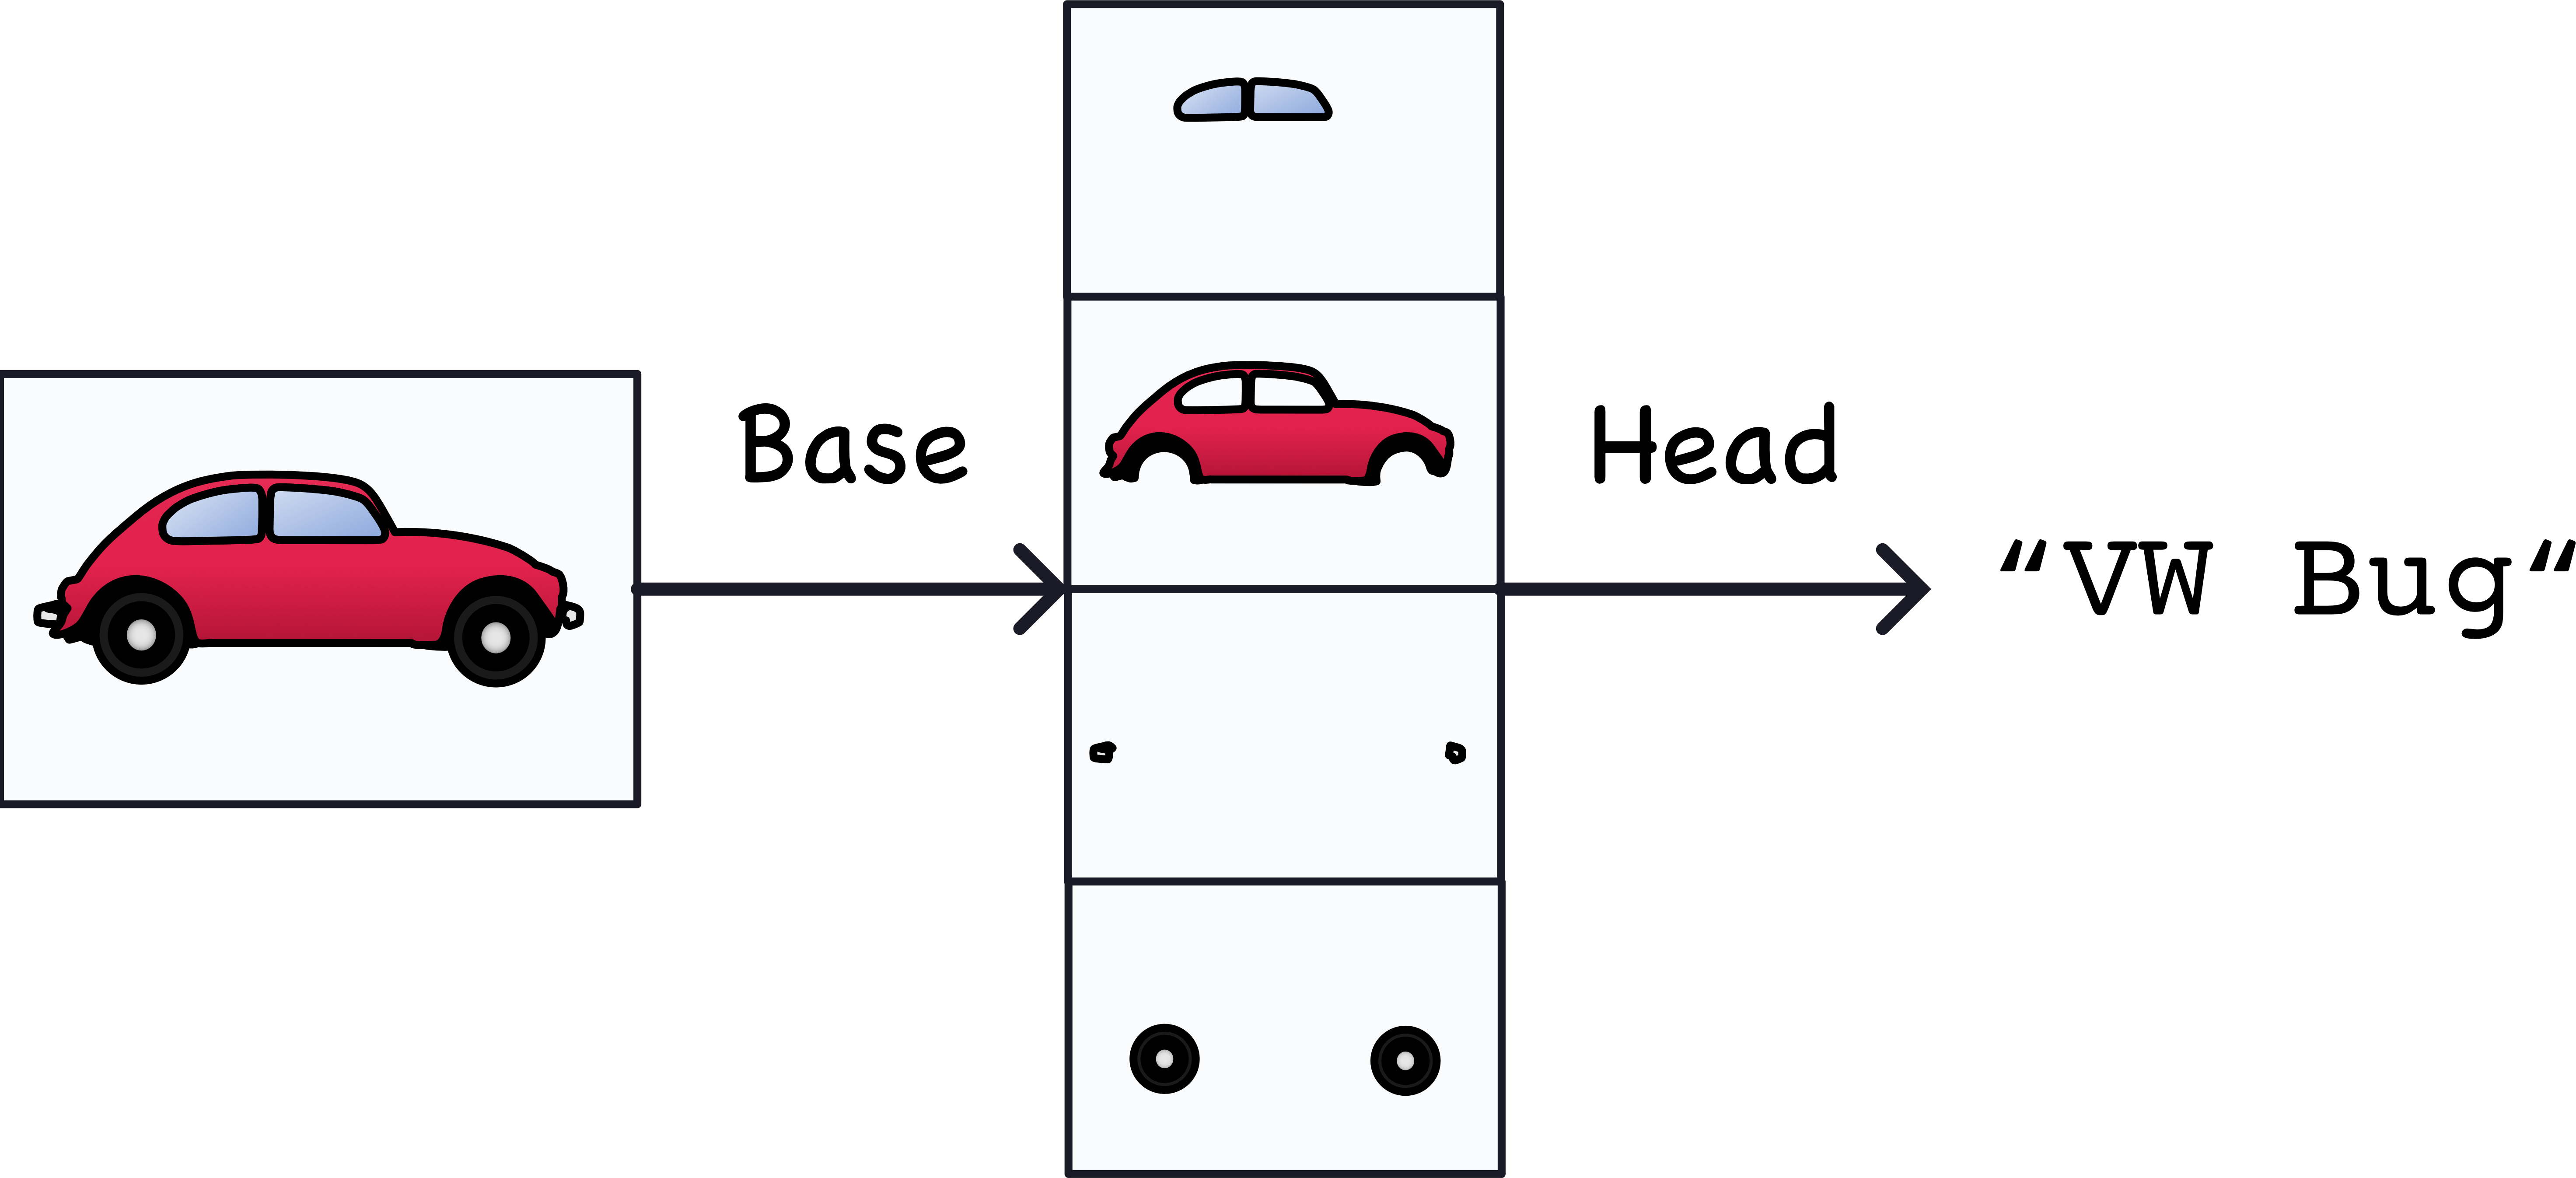

La convolución es una operación matemática, donde se aplica una función a otra función.

Se representa como un asterisco (*).

El resultado se puede entender como una mezcla de las dos funciones.

Son buenas para detectar estructuras sencillas de una imagen, que después se juntan para construir funciones más complejas.

En una red convolucional, este proceso ocurre sobre una serie de muchas capas, en la que c/u realiza una convolución sobre el resultado de la anterior.

Una imagen en una matriz de bytes.



##Entrenamiento del clasificador

Durante el entrenamiento la meta de una red es aprender:

1. qué características extraer de la imágen (base)
2. qué clase tiene esas características (head)

Actualmente las convnets no suelen entrenarse desde el cero, normalmente se reusa la base de un modelo preentrenado. A la base preentrenada se le agrega una head no entrenada. Así, se reusan las partes de la red que han aprendido a extraer características y se les agregan capas que aprendan a clasificar.

Esto permite crear clasificadores muy especializados con relativamente pocos datos. 

Reusar un modelo pre-entrenado es una técnica conocido como **tranferencia de aprendizaje** (*transfer learning*)

<img src = "https://cdn-images-1.medium.com/max/1000/0*ema5cIu34yAeGU5j.png" />

##Ejemplo 1 - Entrenamiento de un clasificador Convnet




###Paso 1 - Leer datos y prepararlos

Veamos varias formas.

Antes de leer el dataset, veamos cómo se lee una imagen y se despliega con matplotlib

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from PIL import Image
path = "/content/drive/MyDrive/CursoPythonAvanzado/BreveRepasoDePython/Datasets/gatito.png"
im = Image.open (path)

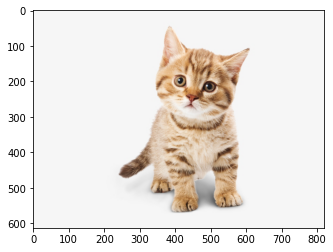

In [5]:
import matplotlib.pyplot as plt

plt.imshow (im)
plt.show ()

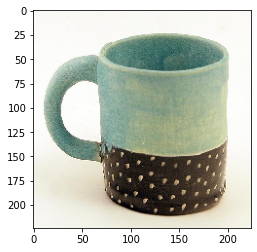

In [6]:
#Otra forma de hacerlo es con keras
from keras.preprocessing.image import load_img
path = "/content/drive/MyDrive/CursoPythonAvanzado/BreveRepasoDePython/Datasets/taza.jpg"
path2 = "/content/drive/MyDrive/CursoPythonAvanzado/BreveRepasoDePython/Datasets/mug.jpg"
imagenTaza = load_img (path2, target_size = (224, 224))

plt.imshow (imagenTaza)
plt.show ()

In [7]:
#Con keras también se puede convertir los pixeles a un arreglo Numpy
from keras.preprocessing.image import img_to_array
imagenTaza = img_to_array (imagenTaza)

#reshape
imagenTaza = imagenTaza.reshape((1, imagenTaza.shape[0], imagenTaza.shape[1], 
                                imagenTaza.shape[2]))

#Necesitan prepararse para el entrenamiento
from keras.applications.vgg16 import preprocess_input
imagenTaza = preprocess_input (imagenTaza)

###Paso 2: Cargar el modelo

Uno de los dataset para preentrenamiento es [ImageNet](https://image-net.org/update-mar-11-2021.php), con imagenes de la naturaleza. Keras incluye varios modelos pre-entrenados con ImageNet en su módulo [applications](https://keras.io/api/applications/). Uno de los modelos es VGG16.

ImageNet es un proyecto para desarrollar dataset de imágenes con sus anotaciones, lo organizó el [ImageNet Large Scale Visual Recognition Challenge](https://https://image-net.org/challenges/LSVRC/) (ILSVRC)

In [8]:
#Keras bajará los archivos de pesos de internet 
#y los almacenará en el directorio /keras/models (cerca de 528 MG)
from keras.applications.vgg16 import VGG16
model = VGG16 ()
print (model.summary ())

553476096/553467096 [==============================] - 5s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

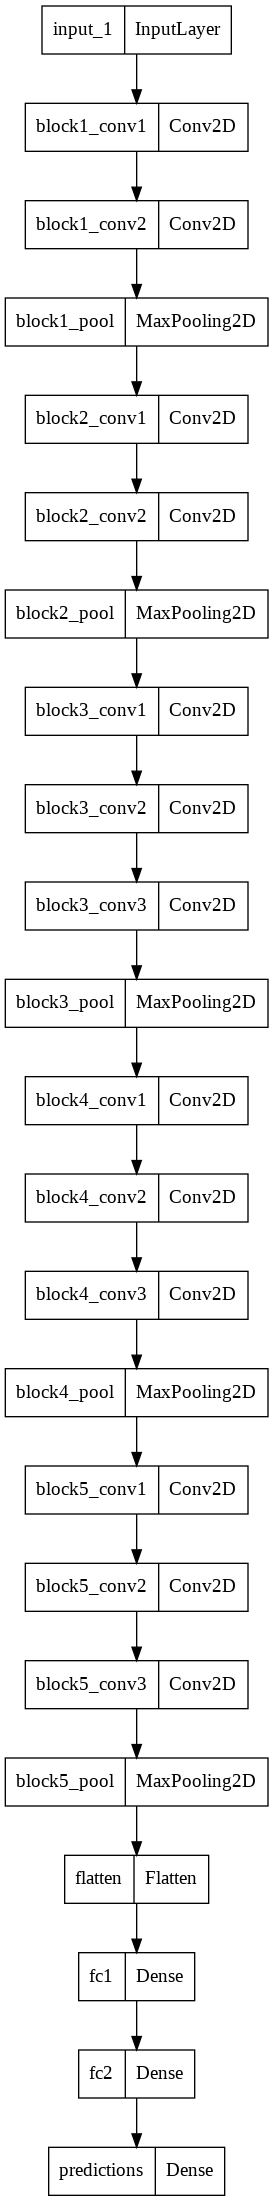

In [9]:
#También se pueden graficar las capas del modelo VGG
from keras.utils.vis_utils import plot_model
plot_model (model)

###Paso 3. Hacer una predicción

In [10]:
yPred = model.predict (imagenTaza)

###Paso 4. Interpretar la predicción


In [11]:
from keras.applications.vgg16 import decode_predictions
# convierte las probabilidades en clases de etiquetas
label = decode_predictions(yPred)
# recupera el resultado, la de probabilidad más alta
label = label[0][0]
# imprime la clasificación
print('%s (%.2f%%)' % (label[1], label[2]*100))

49152/35363 [=========================================] - 0s 0us/step
coffee_mug (69.30%)


##Ejemplo 2 - Entrenamiento de un clasificador convnet

Es un carro o un camión. Se tienen 10,000 fotografías, la mitad de carros.

##Paso 1 - Leer datos

Se importan algunas bibliotecas y se inicializa un pipeline, además se dividen los datos en entrenamiento y validación.

Como se carga un archivo zip y se descomprime

In [12]:
import io
import zipfile

path="/content/drive/MyDrive/CursoPythonAvanzado/BreveRepasoDePython/Datasets/car-or-truck.zip"

data = zipfile.ZipFile (path)
data.extractall ()

In [13]:
# Imports
import os, warnings
import matplotlib.pyplot as plt
from matplotlib import gridspec

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Repetición de circunstancias
def set_seed(seed=31415):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
set_seed(31415)

# Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')
warnings.filterwarnings("ignore") 


# Lectura conjuntos de entrenamiento y validación
ds_train_ = image_dataset_from_directory(
    'car-or-truck/train',
    labels='inferred',
    label_mode='binary',
    image_size=[224, 224],
    interpolation='nearest',
    batch_size=64,
    shuffle=True,
)
ds_valid_ = image_dataset_from_directory(
    'car-or-truck/valid',
    labels='inferred',
    label_mode='binary',
    image_size=[224, 224],
    interpolation='nearest',
    batch_size=64,
    shuffle=False,
)

# Data Pipeline
def convert_to_float(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label

AUTOTUNE = tf.data.experimental.AUTOTUNE
ds_train = (
    ds_train_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)
ds_valid = (
    ds_valid_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)

Found 5117 files belonging to 2 classes.
Found 5051 files belonging to 2 classes.


###Paso 2. Cargar el modelo


In [14]:
from keras.applications.vgg16 import VGG16

model1 = VGG16 ()
model1.trainable = False

###Paso 3. Añadir Head

Para añadir el clasificador, se usará una capa de unidades ocultas, la primera una Dense seguida de una que transforme la salida en probabilidades para la clase Truck.

In [15]:
from tensorflow import keras
from tensorflow.keras import layers

modelC = keras.Sequential([
    model1,
    layers.Flatten(), # Ejemplo (batch_size, 2,2), salida (batch_size, 4)
    layers.Dense(6, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

###Paso 4. Entrenamiento

Finalmente, se entrena el modelo. Como es un problema con 2 clases, se usará la versión binaria de `crossentropy` y el `accuracy`, y el optimizador de `adam`.





In [16]:
modelC.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

history = modelC.fit(
    ds_train,
    validation_data=ds_valid,
    epochs=30,
    verbose=0,
)

KeyboardInterrupt: ignored

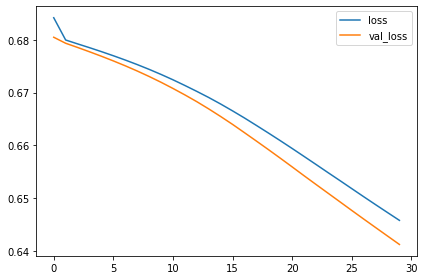

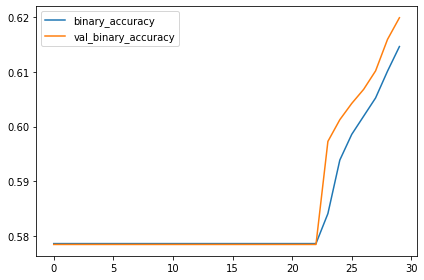

In [ ]:
import pandas as pd

history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();

##Ejercicio 1

Buscar la imagen de un carro y de un camión y ver si los clasifica correctamente

In [ ]:
path = "/content/drive/MyDrive/CursoPythonAvanzado/BreveRepasoDePython/Datasets/taza.jpg"
path2 = "/content/drive/MyDrive/CursoPythonAvanzado/BreveRepasoDePython/Datasets/mug.jpg"
carro = load_img (path2, target_size = (224, 224))
camioneta = load_img (path2, target_size = (224, 224))


#Carro
carro = img_to_array (carro)
#reshape
imagenCarro = imagenCarro.reshape((1, imagenCarro.shape[0], imagenCarro.shape[1], 
                                imagenCarro.shape[2]))

#Necesitan prepararse para el entrenamiento
from keras.applications.vgg16 import preprocess_input
imagenCarro = preprocess_input (imagenCarro)

#Camioneta
camioneta = img_to_array (carro)
#reshape
imagencamioneta = imagencamioneta.reshape((1, imagencamioneta.shape[0], imagencamioneta.shape[1], 
                                imagencamioneta.shape[2]))

#Necesitan prepararse para el entrenamiento
from keras.applications.vgg16 import preprocess_input
imagencamioneta = preprocess_input (imagencamioneta)

##Ejercicio 2

Modificar el Ejemplo 2 para que utilice la red pre-entrenada InceptionV3 (f`rom keras.applications.inception_v3 import InceptionV3`) con las siguientes capas en Head: Flatten (), Dense (units=6, activation='relu'), y Dense (units = 1, activation = 'sigmoid').

Utilice el siguiente optimizador:
optimizer = tf.keras.optimizers.Adam(epsilon=0.01)

Compare resultados con el Ejemplo 2

